#**GroupBy Predictive Model**

**Version 2 - Final**

####Data

The data used in this notebook has been pre-processed and engineered for modeling:

X_ec = independent features from Kaggle data

y_ec = label feature from Kaggle data 

X_json = independent features from GroupBy data

y_json = label features from GroupBy data 

####Model

This version uses a simple multilayer perceptron neural network using Keras sequential model. The sigmoid activation function is used to compute the class probabilities (as it is a binary classification problem). Regularization is used to reduce overfitting.

Refs: 

https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

https://www.kaggle.com/ryanholbrook/binary-classification

https://keras.io/guides/sequential_model/



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
cd '/content/drive/MyDrive/Colab Notebooks/GroupBy_final/FINAL'

/content/drive/MyDrive/Colab Notebooks/GroupBy_final/FINAL


In [3]:
# Import required libraries

# Basic libraries
import pandas as pd
import numpy as np

# Modeling
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from keras.regularizers import l2
from tensorflow.keras.models import model_from_json

# Metrics
from tensorflow.keras import metrics

# Plotting
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

####Load and split data

Dataset 1 (X_train_ec, y_train_ec) = data used to train the base model and transfer learning (80% of Kaggle data)

Dataset 2 (X_val_ec, y_val_ec) = data used to validate the base model (20% of Kaggle data)

Dataset 3 (X_train_json, y_train_json) = data used to train the model with the weights from the base model (80% of GroupBy data)

Dataset 4 (X_val_json, y_val_json) = data used to validate the model with the weights from the base model (10% of GroupBy data)

Dataset 5 (X_test_json, y_test_json) = data used to test the model (10% of the GroupBy data)

In [8]:
# Load data
X_ec = pd.read_csv('X_ec.csv')
y_ec = pd.read_csv('y_ec.csv')
X_json = pd.read_csv('X_json.csv')
y_json = pd.read_csv('y_json.csv')

print(X_ec.shape, y_ec.shape, X_json.shape, y_json.shape)

(3218848, 33) (3218848, 1) (35274, 33) (35274, 1)


In [9]:
# Split data

# Kaggle data
X_train_ec, X_val_ec, y_train_ec, y_val_ec = train_test_split(X_ec, y_ec, test_size=0.2, random_state=0)

In [10]:
# GroupBy data
X_train_json, X_int_json, y_train_json, y_int_json = train_test_split(X_json, y_json, test_size=0.2, random_state=0)
X_val_json, X_test_json, y_val_json, y_test_json = train_test_split(X_int_json, y_int_json, test_size=0.5, random_state=0)

print(f'Dataset 1: {X_train_ec.shape}, {y_train_ec.shape}')
print(f'Dataset 2: {X_val_ec.shape}, {y_val_ec.shape}')
print(f'Dataset 3: {X_train_json.shape}, {y_train_json.shape}')
print(f'Dataset 4: {X_val_json.shape}, {y_val_json.shape}')
print(f'Dataset 5: {X_test_json.shape}, {y_test_json.shape}')

Dataset 1: (2575078, 33), (2575078, 1)
Dataset 2: (643770, 33), (643770, 1)
Dataset 3: (28219, 33), (28219, 1)
Dataset 4: (3527, 33), (3527, 1)
Dataset 5: (3528, 33), (3528, 1)


##Final prediction model development

Transfer learning with neural networks

Simple multilayer perceptron using Keras sequential models


Train model with Dataset 1

In [ ]:
input_dim = X_train_ec.shape[1]
EPOCHS = 100

In [ ]:
# Define the base model
model = Sequential()
model.add(Dense(32, input_dim=input_dim, activation='relu', kernel_regularizer='l1'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Visualize network
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                1088      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 132       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 1,353
Trainable params: 1,289
Non-trainable params: 64
_________________________________________________________________


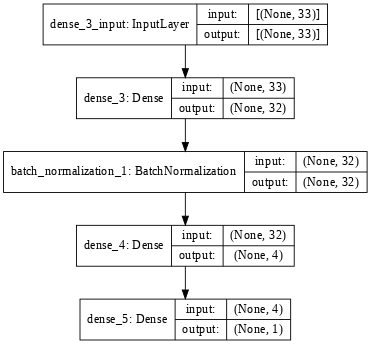

In [ ]:
plot_model(model, show_shapes=True, dpi=64)

In [ ]:
# Fit model with Kaggle data
history = model.fit(X_train_ec, y_train_ec, batch_size=128, validation_data=(X_val_ec, y_val_ec), epochs=EPOCHS, verbose=1) 

Epoch 1/100
20118/20118 [==============================] - 58s 3ms/step - loss: 0.1762 - accuracy: 0.9547 - val_loss: 0.1570 - val_accuracy: 0.9606
Epoch 2/100
20118/20118 [==============================] - 57s 3ms/step - loss: 0.1589 - accuracy: 0.9578 - val_loss: 0.1581 - val_accuracy: 0.9590
Epoch 3/100
20118/20118 [==============================] - 57s 3ms/step - loss: 0.1547 - accuracy: 0.9591 - val_loss: 0.1278 - val_accuracy: 0.9698
Epoch 4/100
20118/20118 [==============================] - 57s 3ms/step - loss: 0.1533 - accuracy: 0.9590 - val_loss: 0.1274 - val_accuracy: 0.9692
Epoch 5/100
20118/20118 [==============================] - 57s 3ms/step - loss: 0.1547 - accuracy: 0.9586 - val_loss: 0.1271 - val_accuracy: 0.9710
Epoch 6/100
20118/20118 [==============================] - 57s 3ms/step - loss: 0.1503 - accuracy: 0.9602 - val_loss: 0.1792 - val_accuracy: 0.9495
Epoch 7/100
20118/20118 [==============================] - 57s 3ms/step - loss: 0.1551 - accuracy: 0.9582 - val_

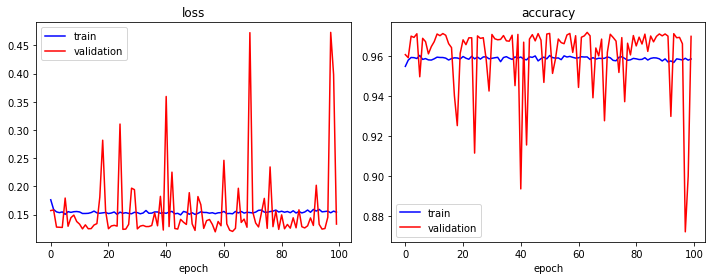

In [ ]:
fig = plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(range(len(history.history['loss'])), history.history['loss'], color='blue', label='train')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], color='red', label='validation')
plt.title('loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], color='blue', label='train')
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], color='red', label='validation')
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Serialize model to JSON
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights('model.h5')

In [ ]:
# Evaluate the model on the training and validation data sets
loss_tr_1, accuracy_tr_1 = model.evaluate(X_train_ec, y_train_ec, verbose=0)
print(f'Accuracy on training data: {accuracy_tr_1*100:.2f}%') 
loss_val_1, accuracy_val_1 = model.evaluate(X_val_ec, y_val_ec, verbose=0)
print(f'Accuracy on validation data: {accuracy_val_1*100:.2f}%')   

Accuracy on training data: 96.92%
Accuracy on validation data: 96.97%


Transfer learning with Dataset 3

In [ ]:
# Load JSON and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_transfer = model_from_json(loaded_model_json)

# load pre-trained weights into new model
model_transfer.load_weights('model.h5')

# Freeze all layers except the last one
for layer in model_transfer.layers[:-1]:
  layer.trainable = False

# Recompile and train (this will only update the weights of the last layer).
model_transfer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit model on the training data from GroupBy
history_transfer = model_transfer.fit(X_train_json, y_train_json, batch_size=128, validation_data=(X_val_json, y_val_json), epochs=EPOCHS, verbose=0)

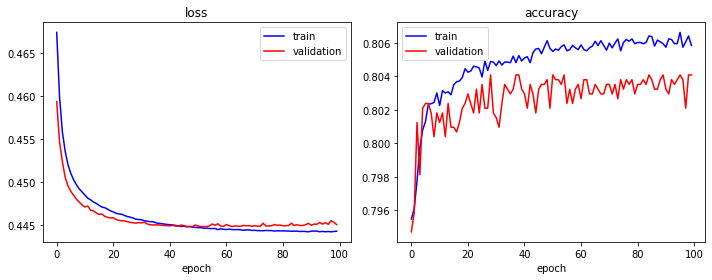

In [ ]:
fig = plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(range(len(history_transfer.history['loss'])), history_transfer.history['loss'], color='blue', label='train')
plt.plot(range(len(history_transfer.history['val_loss'])), history_transfer.history['val_loss'], color='red', label='validation')
plt.title('loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(len(history_transfer.history['accuracy'])), history_transfer.history['accuracy'], color='blue', label='train')
plt.plot(range(len(history_transfer.history['val_accuracy'])), history_transfer.history['val_accuracy'], color='red', label='validation')
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the training and validation data sets
loss_tr_2, accuracy_tr_2 = model.evaluate(X_train_json, y_train_json, verbose=0)
print(f'Accuracy on training data: {accuracy_tr_2*100:.2f}%') 
loss_val_2, accuracy_val_2 = model.evaluate(X_val_json, y_val_json, verbose=0)
print(f'Accuracy on validation data: {accuracy_val_2*100:.2f}%') 

Accuracy on training data: 80.58%
Accuracy on validation data: 80.38%


Predictions on Dataset 5

In [ ]:
# Predictions on GroupBy test data
# Predict probabilities of the test sample belonging to class 1 (purchase)
y_pred_json = model_transfer.predict(X_test_json)

In [ ]:
# Evaluate the model on the test data set
loss, accuracy = model_transfer.evaluate(X_test_json, y_test_json, verbose=0)
print(f'Accuracy on test data: {accuracy*100:.2f}%')    

Accuracy on test data: 80.67%


####Hyperparameter tuning

The accuracy of the base model is above 97%. Use Keras Tuner to search the best learning rate for the optimizer when compiling the trained model with the GroupBy data. Compare metrics with the results above to select best model.

In [ ]:
!pip install keras-tuner

In [ ]:
import keras_tuner as kt

In [ ]:
hp = kt.HyperParameters()
# Repeat transfer learning steps
# Recompile and train (this will only update the weights of the last layer)
def rebuild_model(hp):
  model_transfer_tune = model_from_json(loaded_model_json)
  # load pre-trained weights into new model
  model_transfer_tune.load_weights('model.h5')
  # Freeze all layers except the last one
  for layer in model_transfer_tune.layers[:-1]:
    layer.trainable = False

  # Select learning rate
  hp_lrate = hp.Choice(name='learning_rate', values=[0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001])
  model_transfer_tune.compile(optimizer=optimizers.Adam(learning_rate=hp_lrate), loss='binary_crossentropy', metrics=['accuracy'])
  return model_transfer_tune

In [ ]:
# Initialize the tuner
tuner = kt.RandomSearch(rebuild_model, objective='val_loss', max_trials=5, overwrite=True)

In [ ]:
# Search for best model
tuner.search(X_train_json, y_train_json, epochs=10, validation_data=(X_val_json, y_val_json), verbose=1) 
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 00m 21s]
val_loss: 0.45231786370277405

Best val_loss So Far: 0.44481608271598816
Total elapsed time: 00h 01m 49s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_hps = tuner.get_best_hyperparameters()[0]

print(best_hps.get('learning_rate'))

0.01


In [ ]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                1088      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 132       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 1,353
Trainable params: 5
Non-trainable params: 1,348
_________________________________________________________________


In [ ]:
# Build and train the model with the optimal hyperparameters
model_tuned = tuner.hypermodel.build(best_hps)
history_tuned = model_tuned.fit(X_train_json, y_train_json, validation_data=(X_val_json, y_val_json), epochs=EPOCHS, verbose=0)

val_acc_per_epoch = history_tuned.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print(f'Best epoch: {best_epoch:d}')

Best epoch: 19


In [ ]:
# Re-instantiate the hypermodel and train it with the optimal number of epochs from above
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train_json, y_train_json, validation_data=(X_val_json, y_val_json), epochs=best_epoch, verbose=0)

In [ ]:
# Save model - default Keras method
model_transfer.save('predictor_tl')

INFO:tensorflow:Assets written to: predictor_tl/assets


In [ ]:
# Predictions on test data
# Predict probabilities of the test sample belonging to either class
y_pred_hyper = hypermodel.predict(X_test_json)

In [ ]:
# Evaluate the model on the test data set
loss_hyper, accuracy_hyper = hypermodel.evaluate(X_test_json, y_test_json, verbose=0)
print(f'Accuracy on test data: {accuracy_hyper*100:.2f}%')    

Accuracy on test data: 80.73%


###Metrics

In [11]:
# Load model
from tensorflow.keras.models import load_model
model = load_model('predictor_tl')

In [13]:
# Predictions on GroupBy test data
# Predict probabilities of the test sample belonging to class 1 (purchase)
y_pred_json = model.predict(X_test_json)

In [15]:
# Evaluate the model on the test data set
loss, accuracy = model.evaluate(X_test_json, y_test_json, verbose=0)
print(f'Accuracy on test data: {accuracy*100:.2f}%')    

Accuracy on test data: 80.67%


In [16]:
# Convert probabilities to classes [0, 1]
y_pred_class_json = np.where(y_pred_json > 0.5, 1, 0)

Accuracy = 0.8066893424036281, Precision = 0.8367224880382775, Recall = 0.7737831858407079, F1-score = 0.8040229885057472


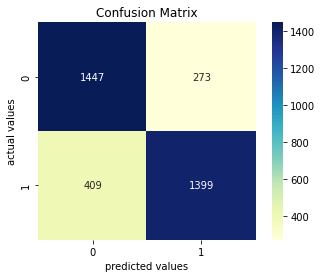

In [19]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Convert dataframe to numpy array to calculate metrics
y_test_json_np = y_test_json.to_numpy()

# Evaluate the predictions
cm = metrics.confusion_matrix(y_test_json_np, y_pred_class_json)
acc   = metrics.accuracy_score(y_test_json_np, y_pred_class_json)
rec   = metrics.recall_score(y_test_json_np, y_pred_class_json)
prec  = metrics.precision_score(y_test_json_np, y_pred_class_json)
f1    = metrics.f1_score(y_test_json_np, y_pred_class_json)

# Print the metrics
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')

# Display the confusion matrix
sns.heatmap(cm, square=True, annot=True, fmt='g', cbar=True, cmap='YlGnBu')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('Confusion Matrix')
plt.show()